# LIST OF FILES
### PRIORITIES 
>title.basics**.csv** <br>
>title.ratings**.csv** <br>
>bom.movie_gross**.csv** <br>
### SECONDARIES
>name.basics**.csv** <br>
>title.akas**.csv** <br>
>title.crew**.csv** <br>
>title.principals**.csv** <br>
>tmdbs.movies**.csv** <br>
>tn.movie_budgets**.csv** <br>
>rt.movie_info**.tsv** <br>
>rt.reviews**.tsv** <br>

### Import Necessary libraries for EDA

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import gaussian_kde

In [174]:
#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')

#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')

#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')

#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')

# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [9]:
imdb_title_basics.info()
# over 40,000 rows missing in runtime_minutes. Suggestion is to fill NaNs with mean
# over 5000 rows missing in genres. Suggestion is NOT to fill with modal as this woudl greatly skew results.
    # Suggestion is to drop those rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
# Create a new dataframe that removes null values from the genres column
# I have decided not to use the "inplace" argument so we preserve the original dataframe
df_title_basics_no_genre_na = imdb_title_basics.dropna(subset=['genres'])

In [14]:
# All of this is to calculate the frequency of genres in the dataframe.

# Majority of movies have multiple genres so we must extract each row's genres and place them into a list
# the resulting variable is a list of lists where each list within the total list is a combination of genres
combination_of_genres = []
for i in df_title_basics_no_genre_na['genres'].to_list():
    combination_of_genres.append(i.split(','))

# Now we must extract those combinations of genres and make a single list that contains all entries of each genre
all_genres = []
for i in combination_of_genres:
    for element in i:
        all_genres.extend(i)

# We form a dictionary of the frequency of each genre in the "all_genre" list
genre_count = dict(Counter(all_genres))

# We also extract the unique genre names from that list
unique_genres = set(genre_count.keys())

In [41]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
# We sort the dictionary by frequency and make a new variable
genre_count_sorted = dict(sorted(genre_count.items(), reverse=True, key=lambda item: item[1]))

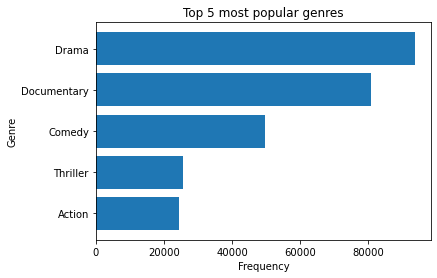

In [17]:
top_5_genres, ax = plt.subplots()
plt.barh(
        list(genre_count_sorted.keys())[0:5],
        list(genre_count_sorted.values())[0:5]
        )
ax.set_title('Top 5 most popular genres')
ax.set_xlabel('Frequency')
ax.set_ylabel('Genre')
ax.invert_yaxis();

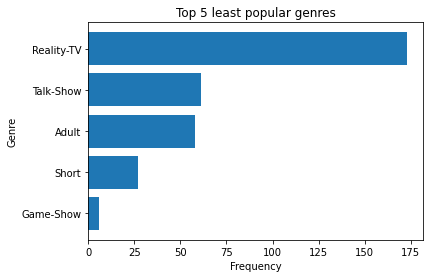

In [18]:
bottom_five_genres, ax = plt.subplots()
plt.barh(
        list(genre_count_sorted.keys())[-5:],
        list(genre_count_sorted.values())[-5:]
        )
ax.set_title('Top 5 least popular genres')
ax.set_xlabel('Frequency')
ax.set_ylabel('Genre')
ax.invert_yaxis()

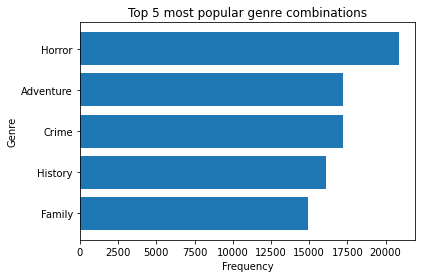

In [42]:
top_five_genre_combinations, ax = plt.subplots()
plt.barh(
        list(genre_count_sorted.keys())[7:12],
        list(genre_count_sorted.values())[7:12]
        )
ax.set_title('Top 5 most popular genre combinations')
ax.set_xlabel('Frequency')
ax.set_ylabel('Genre')
ax.invert_yaxis()


### Summary of title.basics.csv
#### General
Description: This csv simply gives a breakdown of 146,144 movies and their respective genres. <br>
Columns: **tconst(maybe unique_id)**, **primary_title**, **original_title**, **start_year**, **runtime_minutes**, **genres**
#### Quantitative
Unique genres: **27 uinque genres** <br>
List of genres: **1085 genres**. Each movie contains multiple genres <br>
Range of years: 2115 is an outlier. Range is **2017 - 2025 with the modal being 2017** <br>
Average runtime minutes: **86 mins**<br>
Total no. of movies: **146144** <br>
Tconst appears to be a unique identifier for the titles. Will be useful when joining other dataframes <br>

#### Data Cleaning
- Created a new dataframe that drops all rows that have no values for genres

In [25]:
# import title.ratings.csv
df_title_ratings = pd.read_csv('data/title.ratings.csv')
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [27]:
ratings_basics = imdb_title_ratings.merge(imdb_title_basics, how='inner', left_on='tconst', right_on='tconst')
top_5_rated_genres = ratings_basics.groupby(by=['genres'])['averagerating'].mean().sort_values(ascending=False)
ratings_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


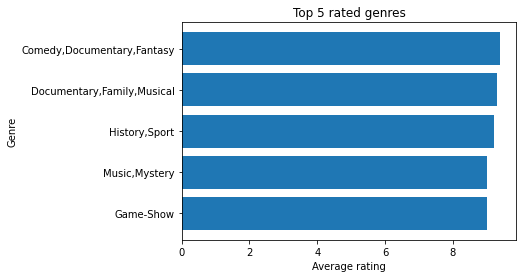

In [28]:
top_5_rated_genres_bar, ax = plt.subplots()
plt.barh(
        list(top_5_rated_genres.keys())[0:5], 
        list(top_5_rated_genres.iloc[0:5])
        )
ax.set_title('Top 5 rated genres')
ax.set_xlabel('Average rating')
ax.set_ylabel('Genre')
ax.invert_yaxis();


## Budget EDA
>**tv_movies_budgets.csv** <br>
Our main focus we'll be measuring profit against budget and analyse any possible correlations. To form profit, we need revenue and cost values. As such, the only suitable table to achieve this is tv_movies_budgets.csv

### Data Cleaning

In [175]:
# First we much check to see if there are any missing values. Thankfully there are non.
# But we do see there are issues with the datatypes. 
#     Both gross figures and budget figures are objects but they need to either be int or float
#     The release date should also either be in datetime or int
tn_movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [177]:
# Problems:
#    The financial figures should be stripped of the dollar sign and the commas and then converted to integers
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [178]:
# We run this code to achieve the desired formatting for the financial figures on each coloumn needed

tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].astype(int)

tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].astype(int)

tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].astype(int)

In [179]:
# We should be wary that, whilst there are no null values, there may be '0' values
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [231]:
# We shall search for a count of these '0' values if they exist
production_budget_0_count = (tn_movies_budgets['production_budget'] == 0).sum()
domestic_gross_0_count = (tn_movies_budgets['domestic_gross'] == 0).sum()
worldwide_gross_0_count = (tn_movies_budgets['worldwide_gross'] == 0).sum()

print(f'production_budget_0_count: {production_budget_0_count}')
print(f'domestic_gross_0_count: {domestic_gross_0_count}')
print(f'worldwide_gross_count_0: {worldwide_gross_0_count}')

# We can see there are hundreds of values missing in the domestic and gross count.
# These are essentially null values and need to be dealt with before analysis

production_budget_0_count: 0
domestic_gross_0_count: 548
worldwide_gross_count_0: 367


In [240]:
# When dealing with null values, we can use the mean, median or drop the rows
# Dropping rows is the last resort as preservation of data is important 

domestic_gross_mean = tn_movies_budgets['domestic_gross'].mean()
worldwide_gross_mean = tn_movies_budgets['worldwide_gross'].mean()

domestic_gross_median = tn_movies_budgets['domestic_gross'].median()
worldwide_gross_median = tn_movies_budgets['worldwide_gross'].median()
                        
print(f'domestic_gross_mean: {domestic_gross_mean} | domestic_gross_median: {domestic_gross_median}')
print(f'worldwide_gross_mean: {worldwide_gross_mean} | worldwide_gross_median: {worldwide_gross_median}')

# As we see, the median is substatially lower than the mean. 

domestic_gross_mean: 41873326.867001034 | domestic_gross_median: 17225945.0
worldwide_gross_mean: 91487460.90643376 | worldwide_gross_median: 27984448.5


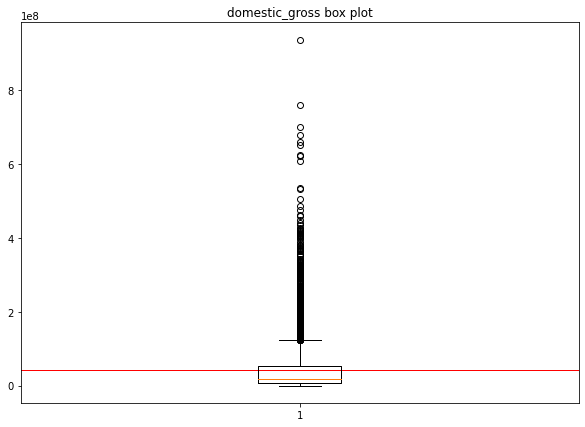

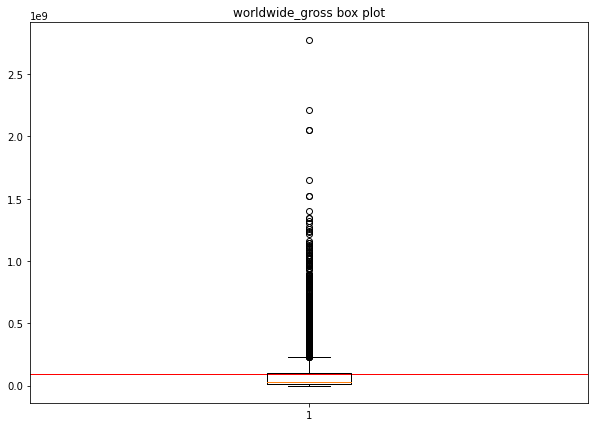

In [264]:
fig, ax = plt.subplots(figsize=(10,7))
ax.axhline(y=domestic_gross_mean, linewidth=1, color='r')
plt.boxplot(tn_movies_budgets['domestic_gross'])
ax.set_title('domestic_gross box plot');

fig, ax = plt.subplots(figsize=(10,7))
ax.axhline(y=worldwide_gross_mean, linewidth=1, color='r')
plt.boxplot(tn_movies_budgets['worldwide_gross'])
ax.set_title('worldwide_gross box plot');

# From the boxplot, in both cases that there are many points beyond the 75th percentile. There is even an outlier.
# Because of this, the mean (red line) is heavily skewed. 
# To mitigate this, the median (orange line) should be prioritised.

In [257]:
# We will replace each 0 value from the domestic_gross and worldwide_gross with their respective medians
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: domestic_gross_median if x==0 else x)
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: worldwide_gross_median if x==0 else x)                                                                                                                                                          
                                                                                  

In [260]:
# Ideally, we'd like to strip month and days from the dates and only leave the years as integers.
# This allows us to use the years as categorical measurements
tn_movies_budgets['release_date'] = tn_movies_budgets['release_date'].apply(lambda x: int(x[-4:]))
tn_movies_budgets['release_date']

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: release_date, Length: 5782, dtype: int64

### Analysis

In [282]:
# Now that the financial figures are numerical, we can create new columns based on simple calculations 
tn_movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,17225945.0,2.798445e+07
5778,79,1999,Following,6000,48482.0,2.404950e+05
5779,80,2005,Return to the Land of Wonders,5000,1338.0,1.338000e+03
5780,81,2015,A Plague So Pleasant,1400,17225945.0,2.798445e+07


In [283]:
# We should be careful not to claim that "gross"-'budget' = 'profit' as there may be other costs outside of production cost
# To be safe, we shall call the new column production_return

tn_movies_budgets['production_return'] = tn_movies_budgets['worldwide_gross'] - tn_movies_budgets['production_budget']

# With this calculation, we shall standardise the production return values by expressing them as a percentage of the budget
tn_movies_budgets['% production_return'] = tn_movies_budgets['production_return'] / tn_movies_budgets['worldwide_gross']

In [284]:
tn_movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_return,% production_return
0,1,2009,Avatar,425000000,760507625.0,2.776345e+09,2.351345e+09,0.846921
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,6.350639e+08,0.607331
2,3,2019,Dark Phoenix,350000000,42762350.0,1.497624e+08,-2.002376e+08,-1.337036
3,4,2015,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,1.072414e+09,0.764364
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,9.997217e+08,0.759251
...,...,...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,17225945.0,2.798445e+07,2.797745e+07,0.999750
5778,79,1999,Following,6000,48482.0,2.404950e+05,2.344950e+05,0.975051
5779,80,2005,Return to the Land of Wonders,5000,1338.0,1.338000e+03,-3.662000e+03,-2.736921
5780,81,2015,A Plague So Pleasant,1400,17225945.0,2.798445e+07,2.798305e+07,0.999950


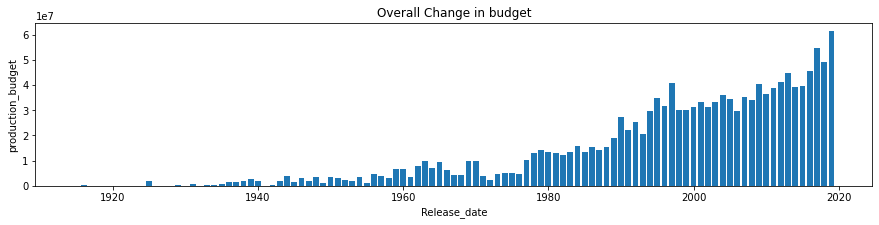

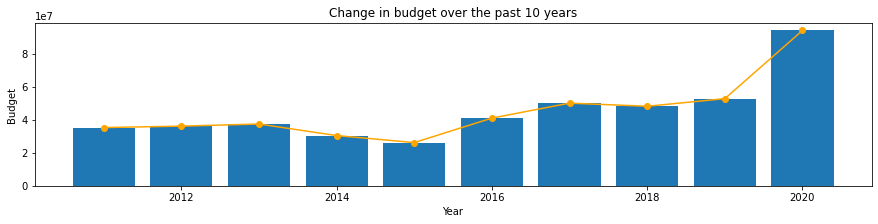

In [288]:
# We shall visualise our results by examining the average budget per year
yearly_mean_budget = tn_movies_budgets.groupby(by=['release_date'])['production_budget'].mean()

fig, ax = plt.subplots(figsize=(15,3))

plt.bar(
       list(mean_budgets_over_time.keys()), 
       list(mean_budgets_over_time)
       )

ax.set_title('Overall Change in budget')
ax.set_xlabel('Release_date')
ax.set_ylabel('production_budget');


# To make the data more recent, we shall focus on the most recent 10 years of data
mean_budgets_over_time_bar, ax = plt.subplots(figsize=(15,3))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

plt.bar(
       list(yearly_mean_budget.keys())[-10:], 
       list(yearly_mean_budget)[-10:]
       )

ax.set_title('Change in budget over the past 10 years')
ax.set_xlabel('Year')
ax.set_ylabel('Budget')
plt.plot(
        list(yearly_mean_budget.keys())[-10:], 
        list(yearly_mean_budget)[-10:], '-o', color='orange'
        );

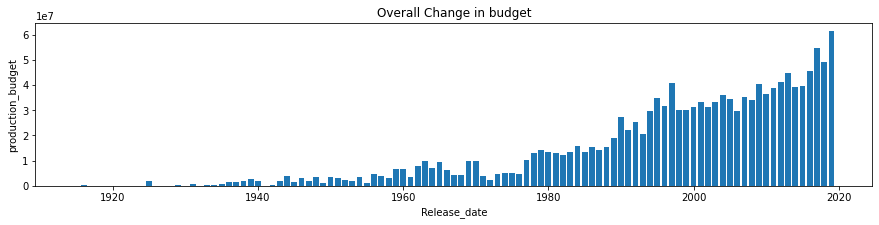

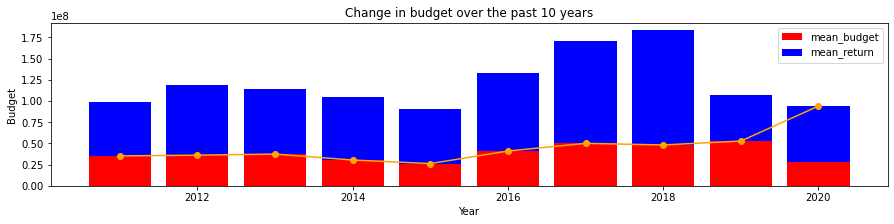

In [297]:
# We shall visualise our results by examining the average budget per year
yearly_mean_budget = tn_movies_budgets.groupby(by=['release_date'])['production_budget'].mean()
yearly_mean_return = tn_movies_budgets.groupby(by=['release_date'])['production_return'].mean()

fig, ax = plt.subplots(figsize=(15,3))

plt.bar(
       list(mean_budgets_over_time.keys()), 
       list(mean_budgets_over_time)
       )

ax.set_title('Overall Change in budget')
ax.set_xlabel('Release_date')
ax.set_ylabel('production_budget');


# To make the data more recent, we shall focus on the most recent 10 years of data
mean_budgets_over_time_bar, ax = plt.subplots(figsize=(15,3))

plt.bar(
       list(yearly_mean_budget.keys())[-10:], 
       list(yearly_mean_budget)[-10:],
       color = 'red',
       label = 'mean_budget'
       )

plt.bar(
       list(yearly_mean_return.keys())[-10:], 
       list(yearly_mean_return)[-10:],
       bottom=list(yearly_mean_budget)[-10:],
       color = 'b',
       label = 'mean_return'
       )

ax.legend()
ax.set_title('Change in budget over the past 10 years')
ax.set_xlabel('Year')
ax.set_ylabel('Budget')
plt.plot(
        list(yearly_mean_budget.keys())[-10:], 
        list(yearly_mean_budget)[-10:], '-o', color='orange'
        );

### Minutes vs Profit
>title.basics**.csv** <br>
>tn.movie_budgets**.csv** <br>

In [37]:
title_budgets['runtime_minutes'] = title_budgets['runtime_minutes'].fillna(title_budgets['runtime_minutes'].mean())

correlation between runtime_minutes and profit = 0.2519317531484308


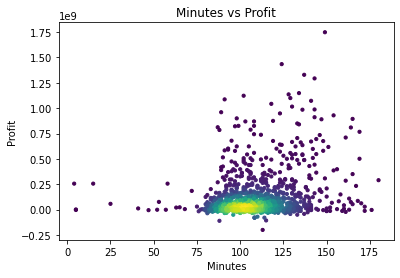

In [38]:
minutesprofit = np.vstack([title_budgets['runtime_minutes'],title_budgets['profit']])
z = gaussian_kde(minutesprofit)(minutesprofit)

minutes_profit_bar, ax = plt.subplots()
plt.scatter(
            title_budgets['runtime_minutes'], 
            title_budgets['profit'],
            c=z,
            s=10
            )
ax.set_title('Minutes vs Profit')
ax.set_xlabel('Minutes')
ax.set_ylabel('Profit')

minutes_profit_correlation = np.corrcoef(title_budgets['runtime_minutes'], title_budgets['profit'])[1,0]

print(f'correlation between runtime_minutes and profit = {minutes_profit_correlation}')

### Budgets vs Profit
>title.basics**.csv** <br>
>tn.movie_budgets**.csv** <br>

correlation between runtime_minutes and profit = 0.6522781876632836


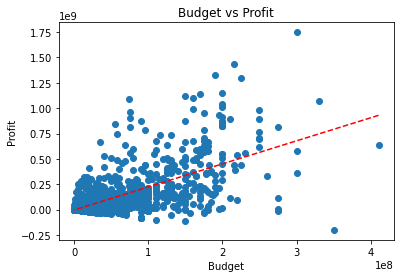

In [39]:
budgets_vs_profit_bar, ax = plt.subplots()
plt.scatter(
            title_budgets['production_budget'], 
            title_budgets['profit'],
            )
ax.set_title('Budget vs Profit')
ax.set_xlabel('Budget')
ax.set_ylabel('Profit')

z2 = np.polyfit(title_budgets['production_budget'], title_budgets['profit'], 1)
p = np.poly1d(z2)
plt.plot(title_budgets['production_budget'],p(title_budgets['production_budget']),"r--")

budget_profit_correlation = np.corrcoef(title_budgets['production_budget'], title_budgets['profit'])[1,0]

print(f'correlation between runtime_minutes and profit = {budget_profit_correlation}')